Stock Market Analysis

In this project I will be looking at data from the stock market, particularly some technology stocks. Looking at a few ways of analyzing the risk of a stock, based on its previous performance history. I will also be predicting future stock prices through a Monte Carlo method!

I'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?


Importing the Necessary Libraries

In [66]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly.express as px
from datetime import datetime

In [64]:
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from pandas_datareader import data as web

Listing out the Tech Stocks I'll use for this analysis

In [44]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

Setting up End and Start times for the data grab

In [45]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

Using a For loop to grab yfinance data and set as a dataframe

In [67]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34083100,AMAZON
2023-08-29,133.380005,135.139999,133.250000,134.910004,134.910004,38646100,AMAZON


NB: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Cheacking the Data Stats and Information

In [68]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,159.798453,161.577302,158.195953,159.958432,159.467587,6.976309e+07
std,18.548924,18.318301,18.825423,18.565234,18.734732,2.386290e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.817505,147.360004,144.072502,145.924995,145.292130,5.139045e+07
50%,154.805000,157.095001,153.415001,155.154999,154.485619,6.528460e+07
75%,176.532501,176.669998,174.040005,175.532494,175.355064,8.129510e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [69]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-08-30 to 2023-08-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


To plot out the Closing Price and Volume of the Stocks

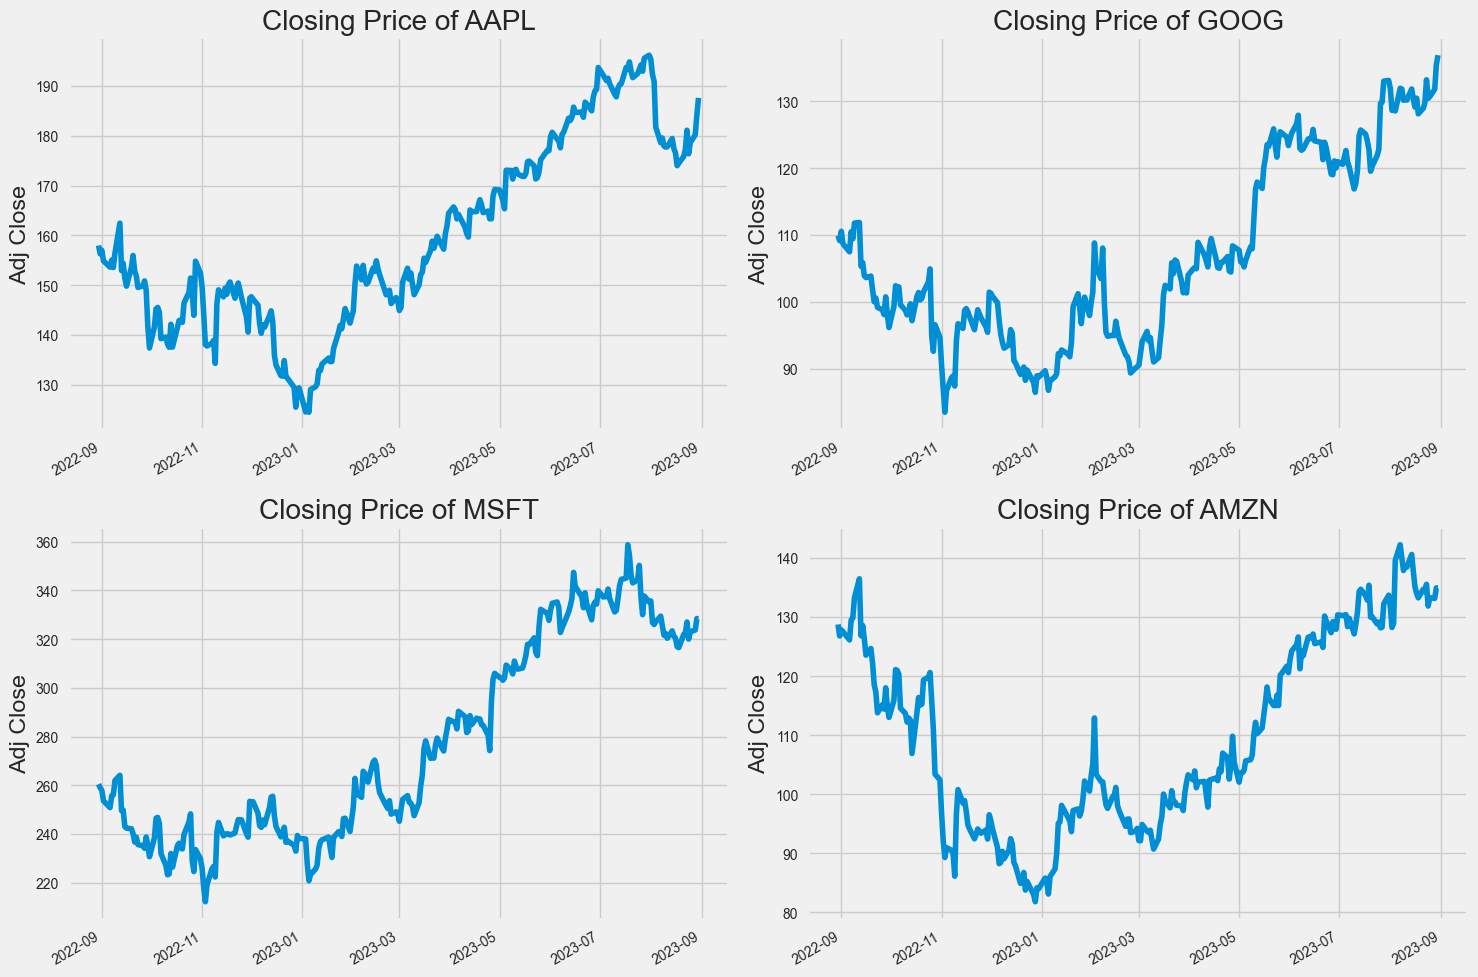

In [72]:
# To view a trend of the closing price of the stocks

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

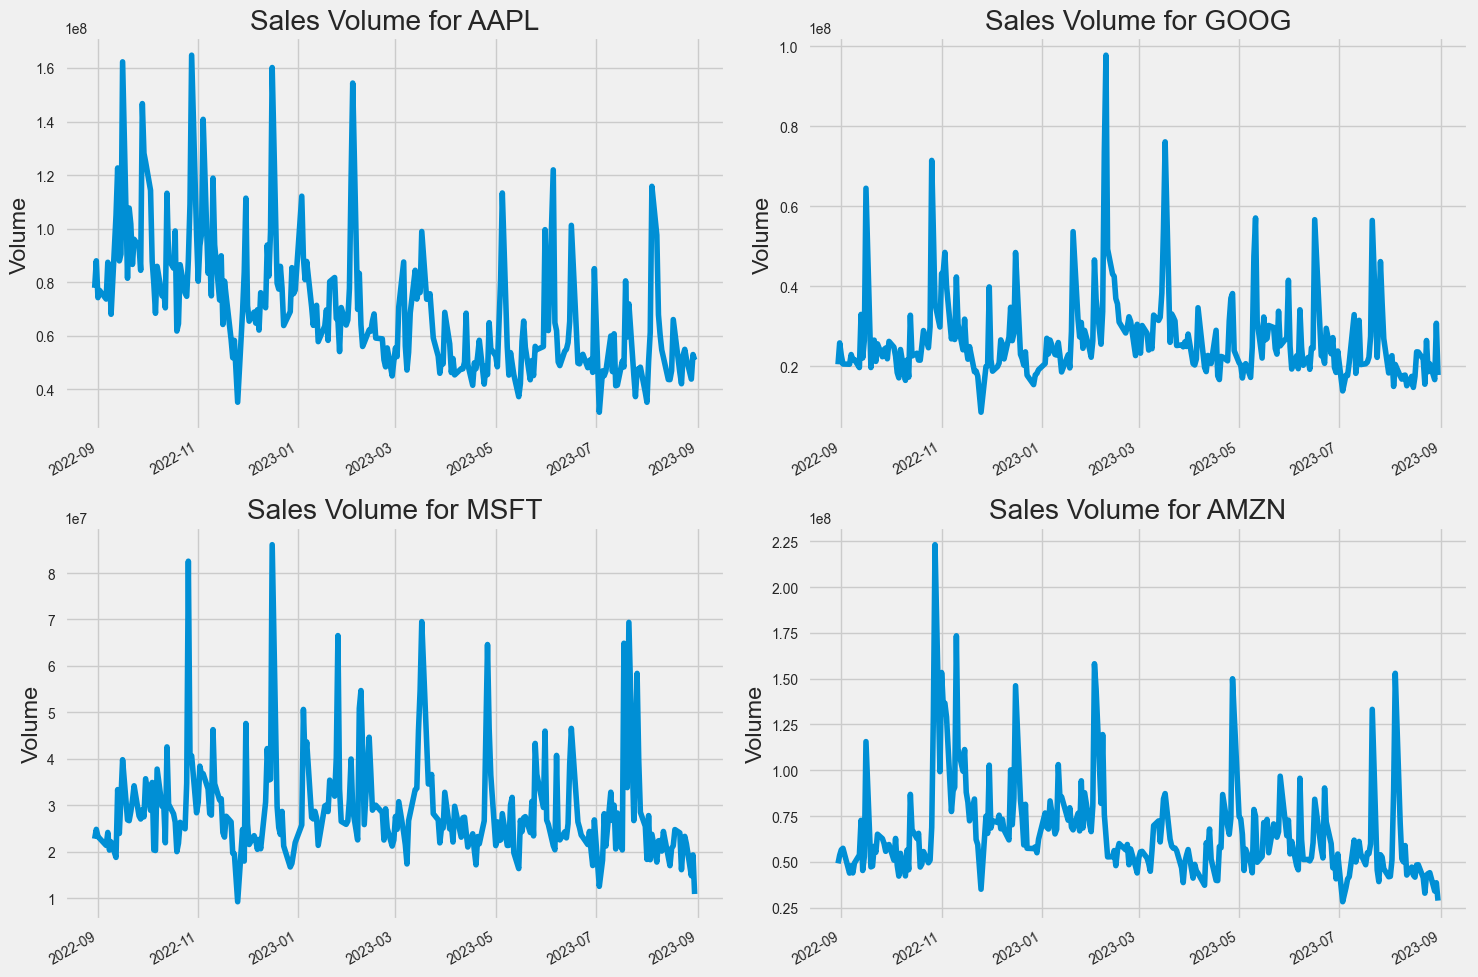

In [73]:
# Now let's plot the total volume of stocks being traded each day

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

To caculate the moving average for the stocks.

NB: Pandas has a built-in rolling mean calculator

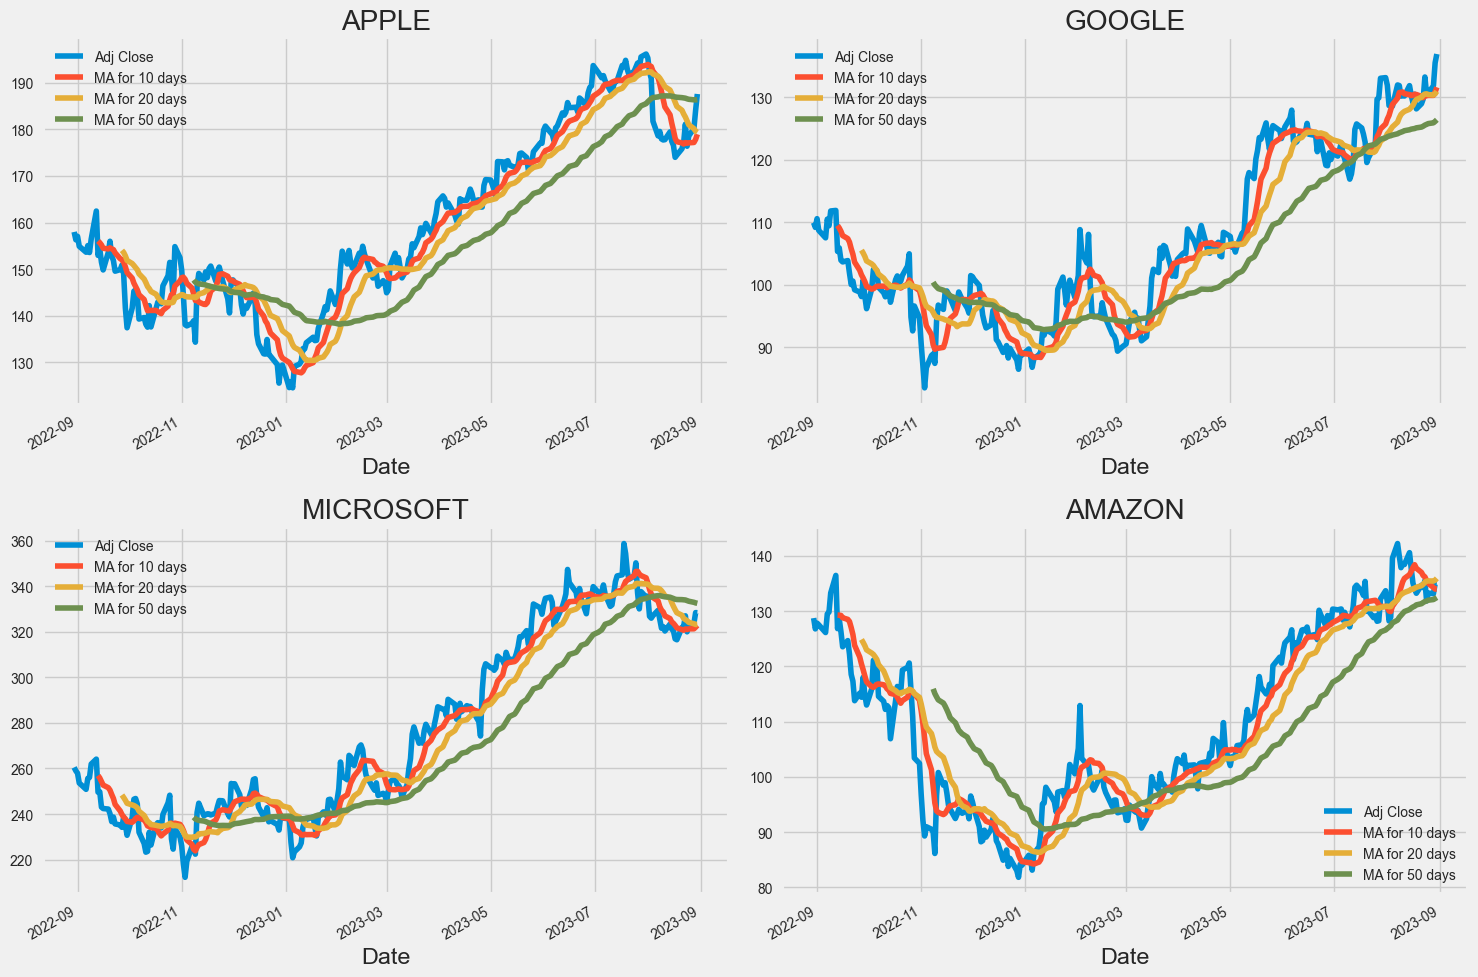

In [74]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


Section 2 - Daily Return Analysis

After carrying out some baseline analysis, lets analyze the risk of the stocks. In order to do so lets take a closer look at the daily changes of the stocks, and not just its absolute value. I'd use pandas to retrieve the daily returns for each stock.


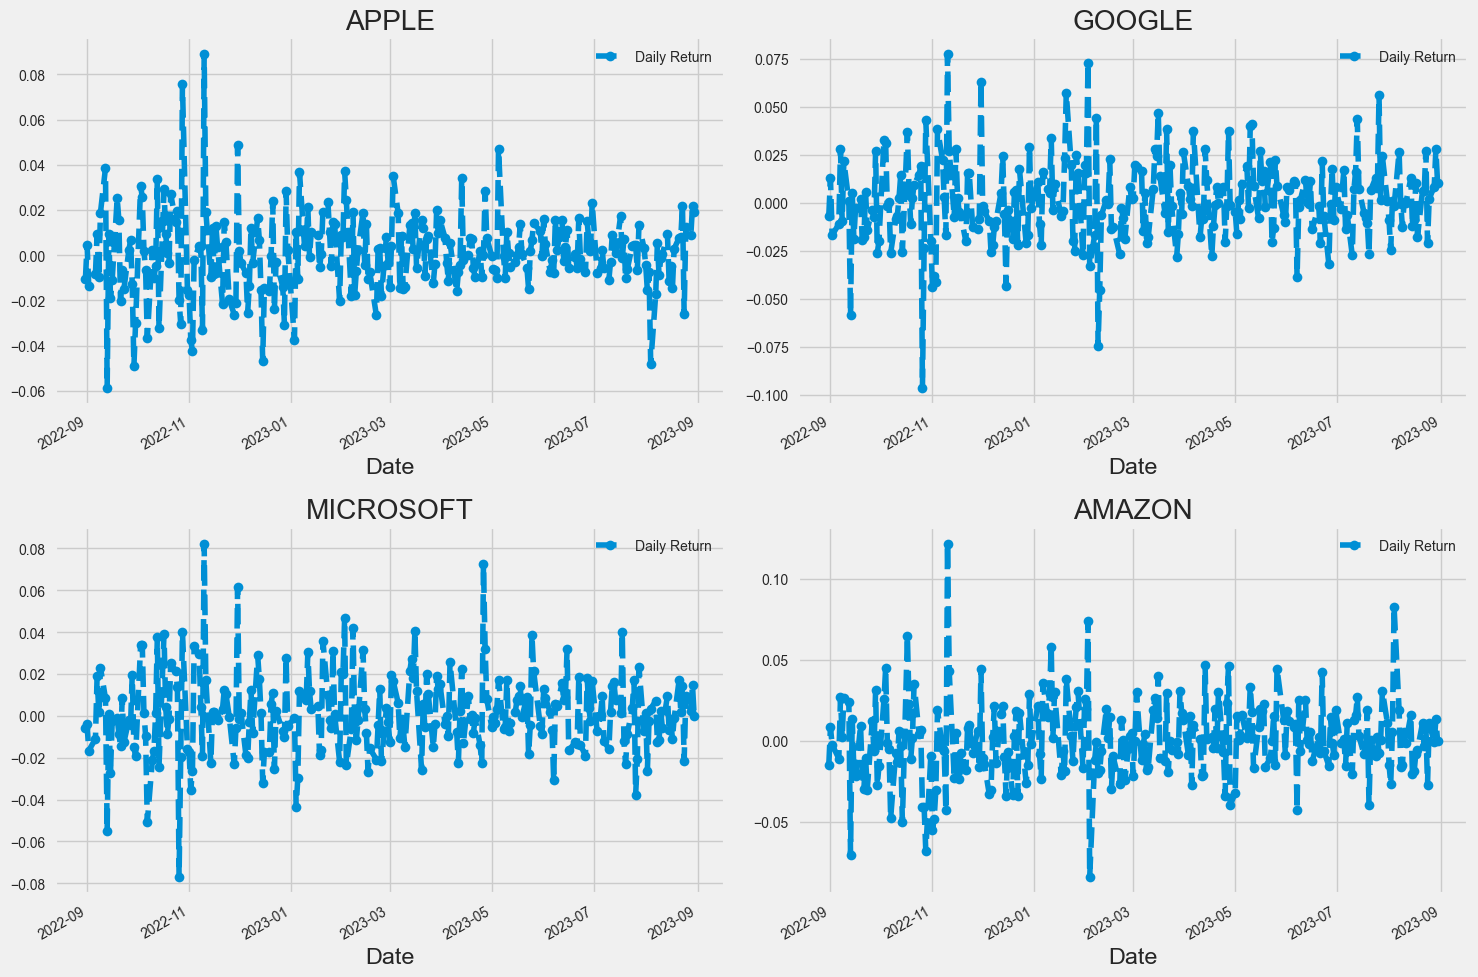

In [75]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
     

Next let's get an overall look at the average daily return using a histogram.

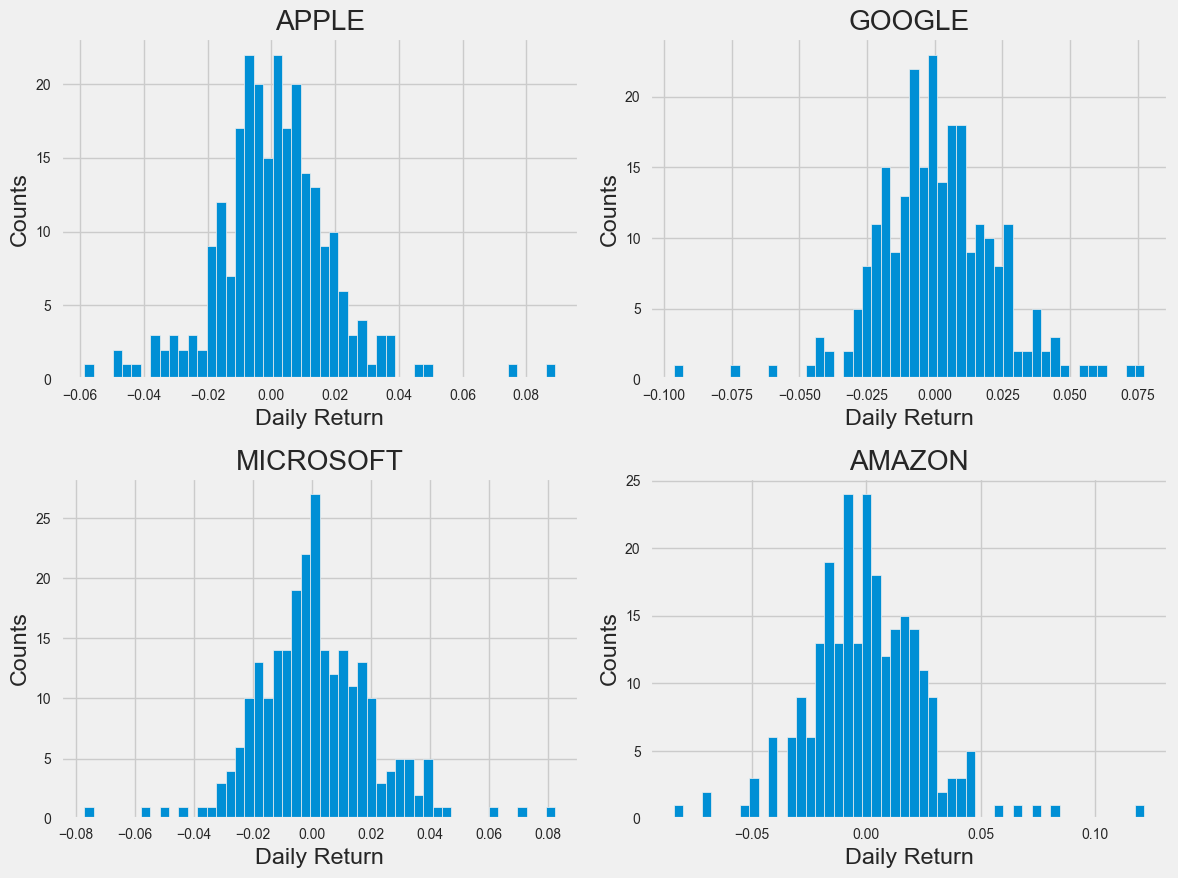

In [76]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

To analyze the returns of all the stocks in our list, Let's go ahead and build a single DataFrame with all the 'Close' columns for each of the stocks dataframes.

In [91]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-30,NaN,NaN,NaN,NaN
2022-08-31,-0.010635,-0.015226,-0.006915,-0.005704
2022-09-01,0.004707,0.008283,0.012826,-0.004092
2022-09-02,-0.013611,-0.002425,-0.016915,-0.016667
2022-09-06,-0.008215,-0.010980,-0.011042,-0.010974


To compare the daily percentage return of two stocks to check how they correlate, but first let's see a stock compared to itself.

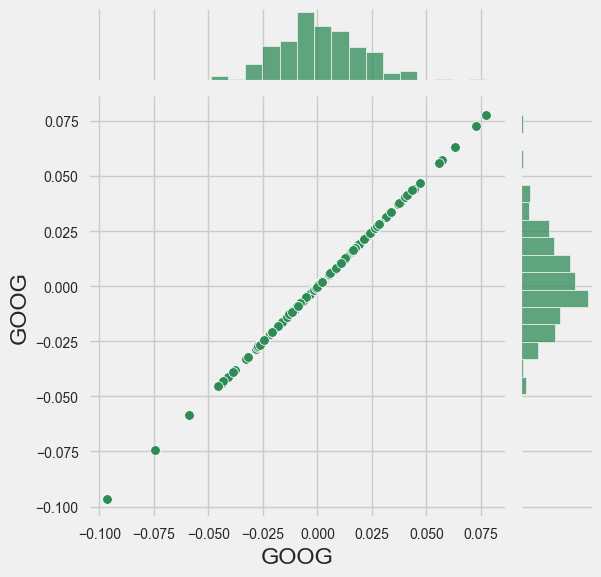

In [97]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

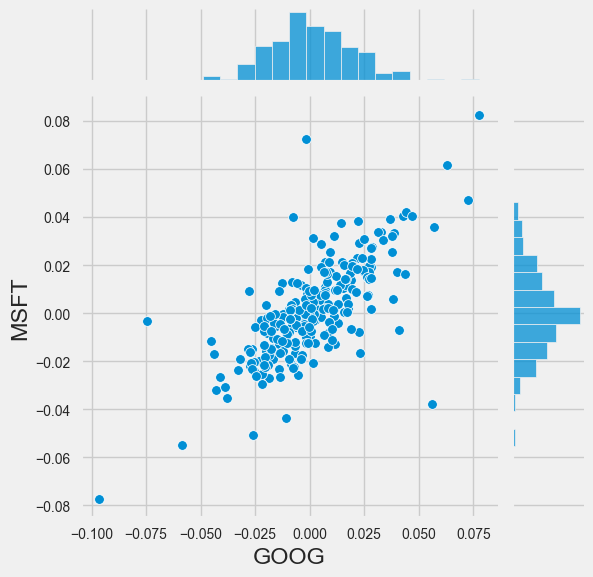

In [98]:
# Use joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons

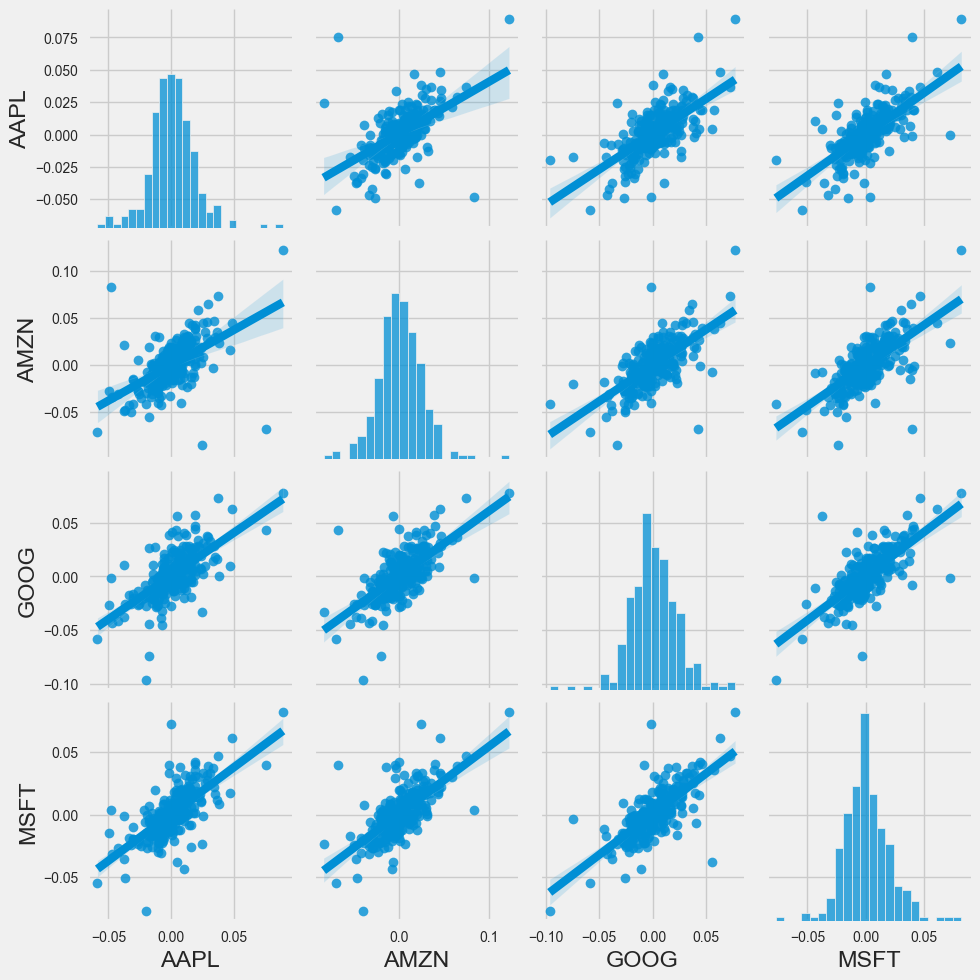

In [99]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

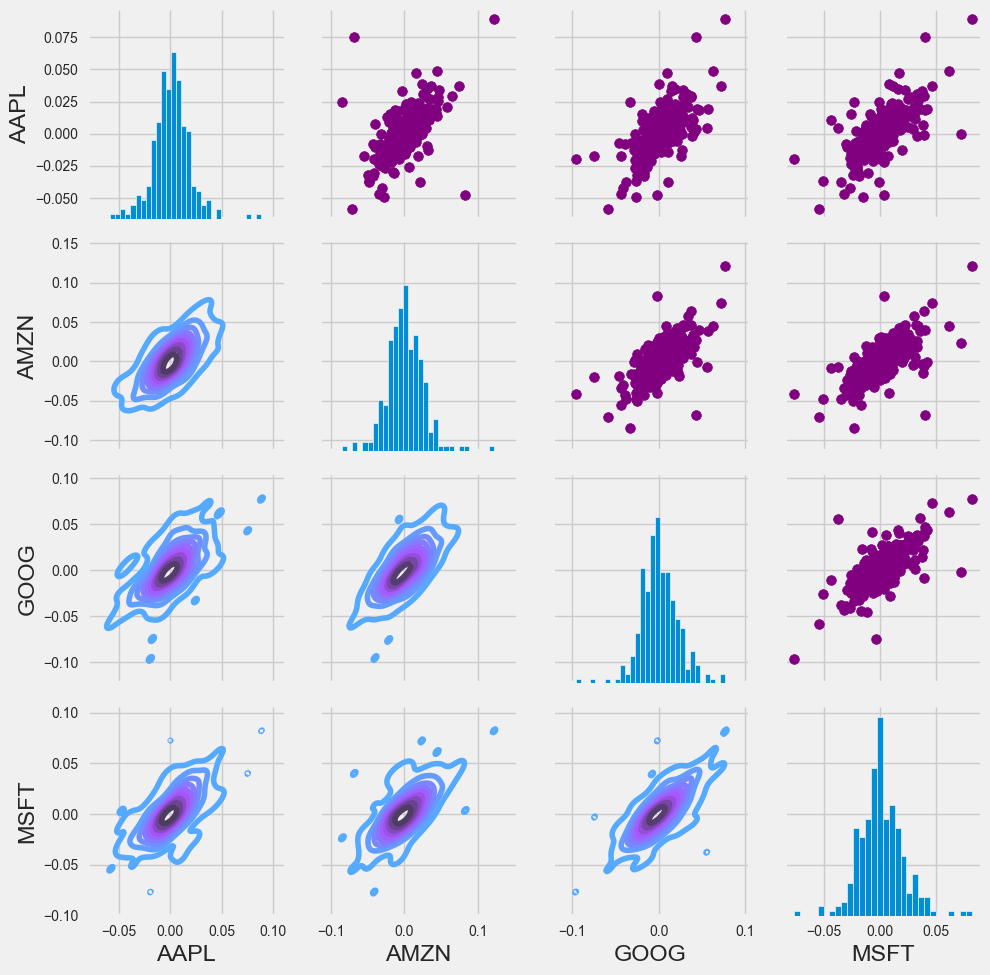

In [100]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

NB: We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

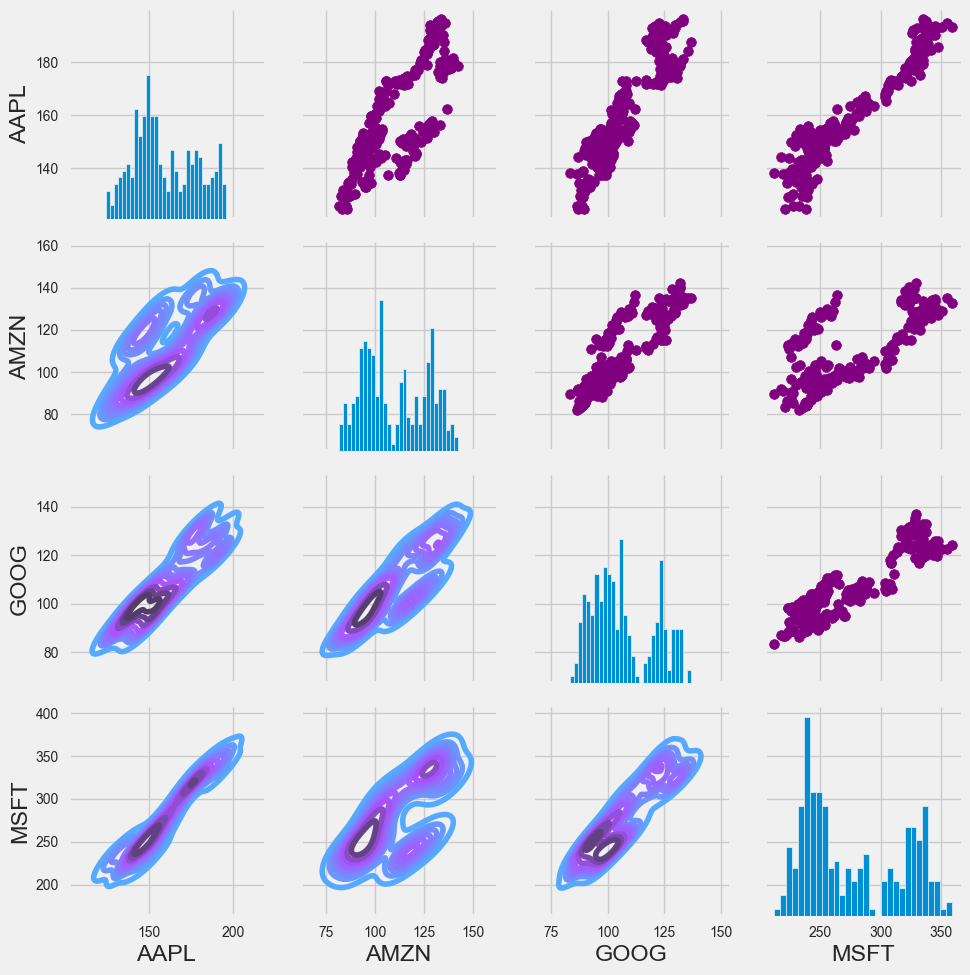

In [101]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values as well as the closing prices. By comparing these prices, we can see an interesting relationship between the stocks.

Text(0.5, 1.0, 'Correlation of stock closing price')

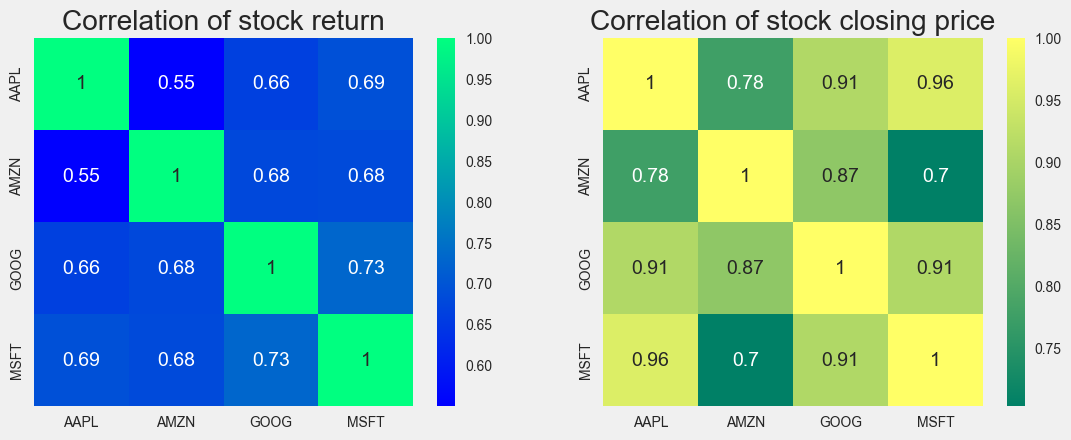

In [103]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

It's interesting to see that all the technology comapnies are positively correlated.


Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


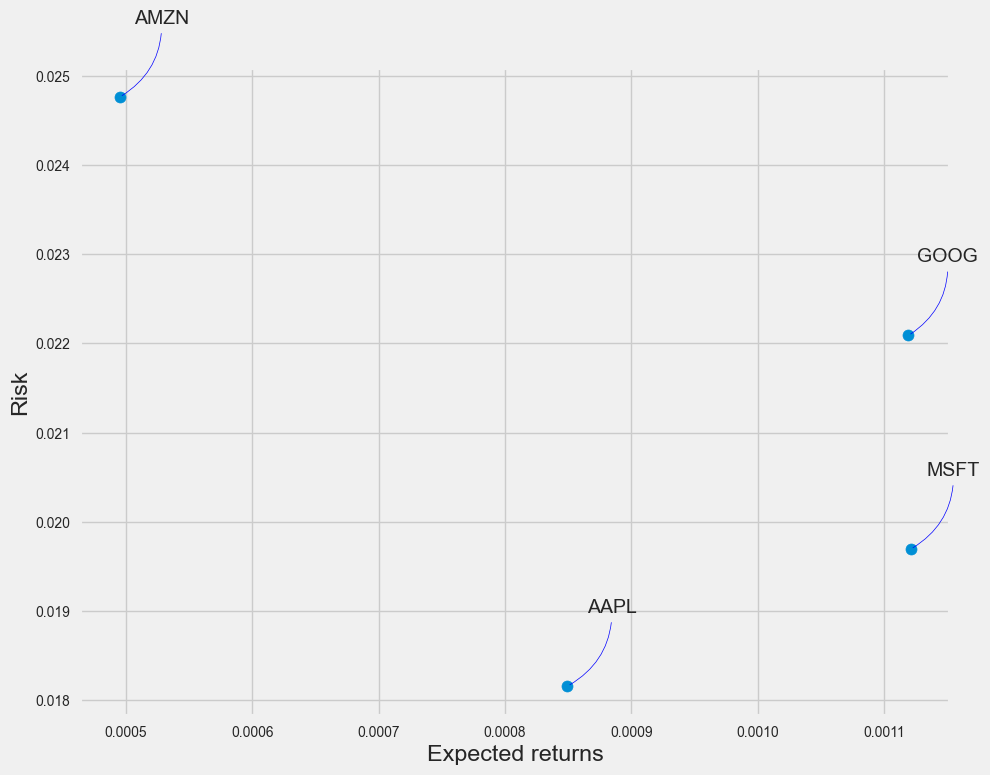

In [105]:
# Start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Value at Risk

To define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


Method 1: Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns.

To view the daily returns histogram for Apple stock
Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

C:\Users\USER\AppData\Local\Temp\ipykernel_6080\161050587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

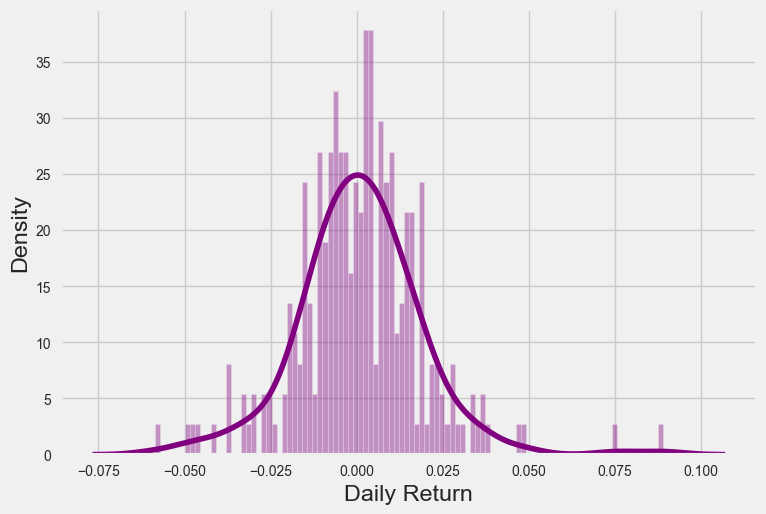

In [106]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


Now we can use quantile to get the risk value for the stock.


In [107]:
#The 0.05 empirical quantile of daily returns

rets['AAPL'].quantile(0.05)

-0.028359603851510762


The 0.05 empirical quantile of daily returns is at -0.028. That means that with 95% confidence, our worst daily loss will not exceed 2.8%. For example, If we have a 1 million dollar investment, our one-day 5% VaR is 0.028 * 1,000,000 = $28,000


Method 2: Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG


In [108]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']


Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated to form our daily returns


In [115]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


Now let's put our function to work!


In [110]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-08-30,111.029999,111.370003,108.800003,109.910004,109.910004,20548200,GOOGLE,NaN,NaN,NaN,NaN
2022-08-31,111.629997,111.769997,109.050003,109.150002,109.150002,25898000,GOOGLE,NaN,NaN,NaN,-0.006915
2022-09-01,109.199997,111.220001,108.190002,110.550003,110.550003,22784400,GOOGLE,NaN,NaN,NaN,0.012826
2022-09-02,111.339996,111.675003,108.129997,108.680000,108.680000,20618100,GOOGLE,NaN,NaN,NaN,-0.016915
2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100,GOOGLE,NaN,NaN,NaN,-0.011042


From the table above, we can see that our Google starting price i.e "Open" is 111.029999


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

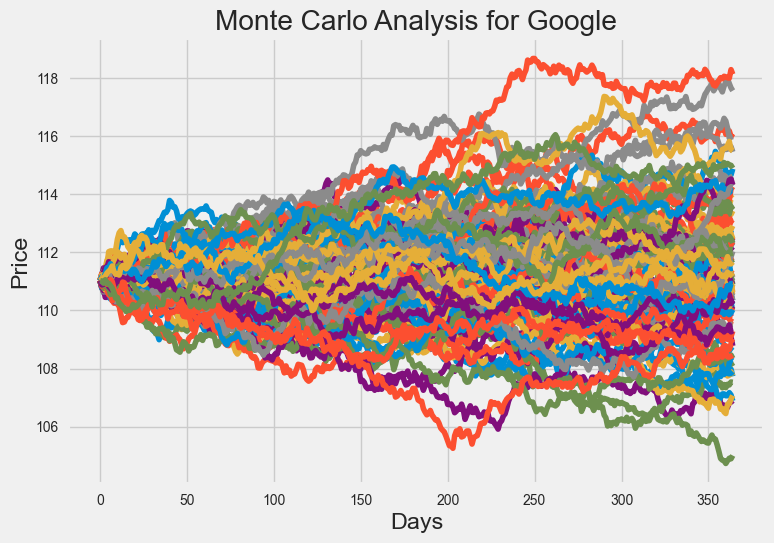

In [116]:
start_price = 111.029999

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)


In [117]:
# Set a large numebr of runs

runs = 10000

# Create an empty matrix to hold the end price data

simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output

np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];



Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.


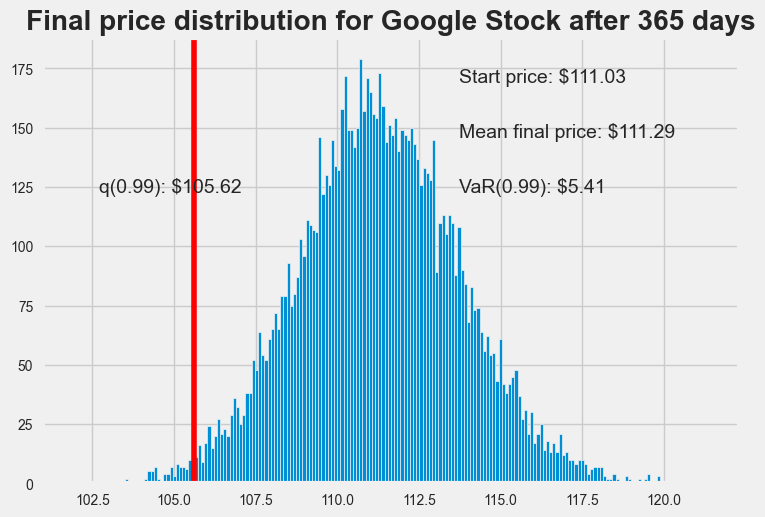

In [118]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');



From the histogram above, we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $5.41 for every investment of $111.03 (the price of one inital google stock).

This basically means for every initial stock you purchase, you are putting about $5.41 at risk 99% of the time from our Monte Carlo Simulation.


To check the Stock Prices of Amazon for about 10years

In [124]:
# Get the stock quote
quota = pdr.get_data_yahoo('AMZN', start='2013-01-01', end=datetime.now())

# Show the data
quota

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34083100


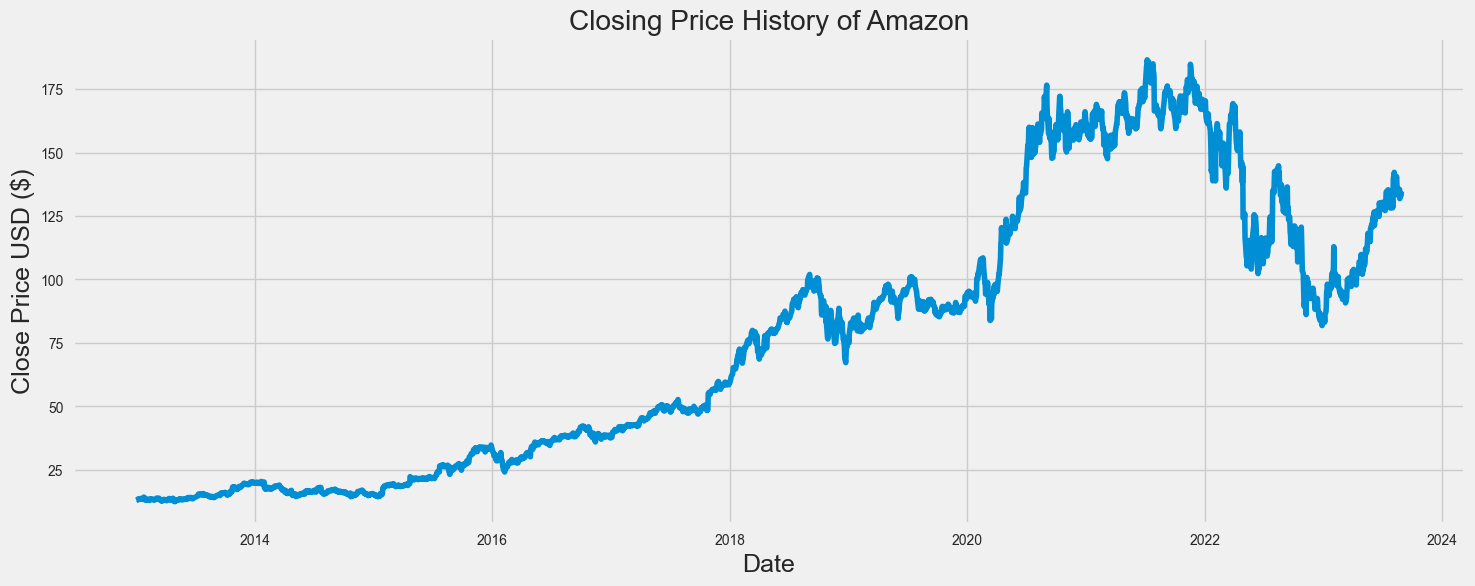

In [127]:
plt.figure(figsize=(16,6))
plt.title('Closing Price History of Amazon')
plt.plot(quota['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

The chart above shows that within 10years the Amazon stock has grown drastically with its highest peak within 2020 to 2022.